In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier



In [2]:
df = pd.read_csv('../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### 🔹 Encode Target Variable (Churn)

In [3]:
# Convert "Yes" to 1, "No" to 0:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df.groupby('Churn').size()

Churn
0    5174
1    1869
dtype: int64

#### 🔹 Separate Features and Target

In [4]:
# customerID is a useless identifie
X = df.drop(['Churn', 'customerID'], axis=1)
y = df['Churn']

#### 🔹 Encode Categorical Variables

In [5]:
X_encoded = pd.get_dummies(X, drop_first=True)

##### 🔹 Split into Train/Test Sets

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

##### 🔹 Scale numeric features?

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### ✅ Logistic Regression

#### 🔹 Fit the Model

In [8]:
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


#### 🔹 Make Predictions

In [9]:
y_pred = lr.predict(X_test_scaled)
y_prob = lr.predict_proba(X_test_scaled)[:, 1]  # For AUC and threshold tuning

#### 🔹 Evaluate the Model

Accuracy: 0.7764371894960965
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1035
           1       0.59      0.50      0.54       374

    accuracy                           0.78      1409
   macro avg       0.71      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409

ROC AUC: 0.8025988788137126


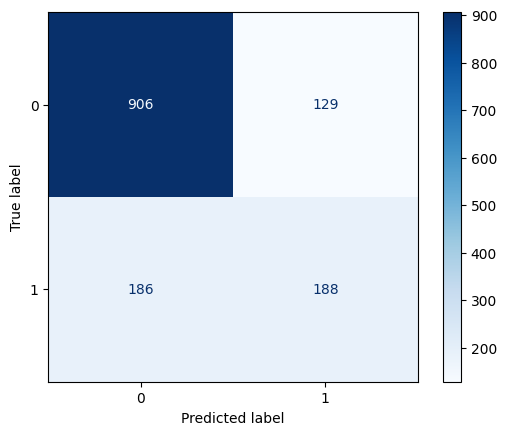

In [10]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report
print(classification_report(y_test, y_pred))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(lr, X_test_scaled, y_test, cmap="Blues")

# ROC AUC Score
print("ROC AUC:", roc_auc_score(y_test, y_prob))


### ✅ Random Forest Classifier


#### 🔹 Train the Model

In [11]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


#### 🔹 Predict and Evaluate

In [12]:
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

#### 🔹 Evaluation Metrics

Random Forest Accuracy: 0.7955997161107168
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1035
           1       0.66      0.47      0.55       374

    accuracy                           0.80      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.80      0.78      1409

ROC AUC: 0.8277351520318271


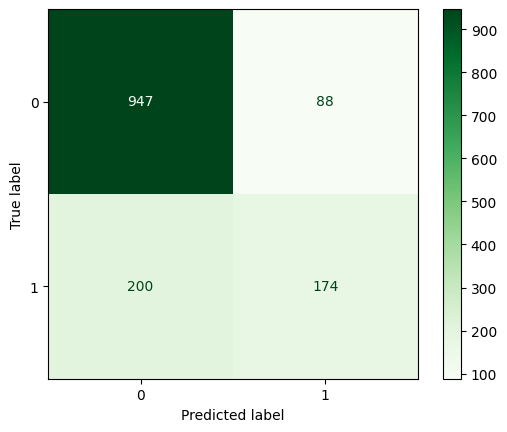

In [13]:

# Accuracy & Report
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, cmap="Greens")

# AUC Score
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))

#### 🔹 Feature Importance

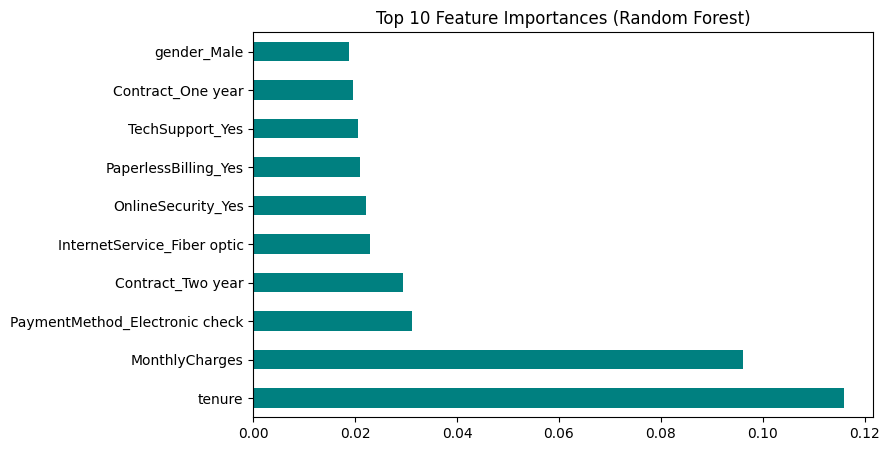

In [14]:
# Get feature importances
importances = pd.Series(rf.feature_importances_, index=X_train.columns)
importances.nlargest(10).plot(kind='barh', figsize=(8, 5), color='teal')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.show()

### ✅ XGBoost Classifier

#### 🔹 Train

In [15]:
xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    random_state=42,
    #use_label_encoder=False,
    eval_metric='logloss',
)

xgb.fit(X_train, y_train)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


#### 🔹 Predict and Evaluate

In [16]:
y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]

XGBoost Accuracy: 0.7998580553584103
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.65      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409

ROC AUC: 0.8433258415355602


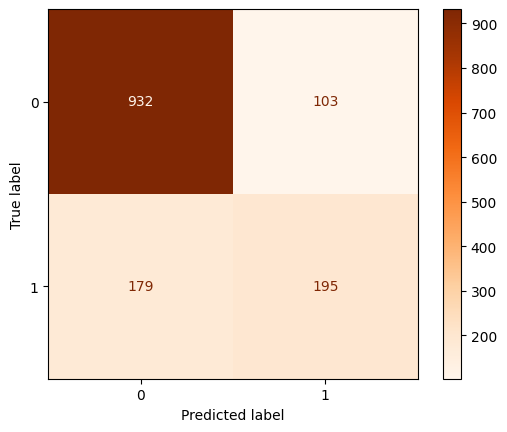

In [17]:
# Evaluation
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print("ROC AUC:", roc_auc_score(y_test, y_prob_xgb))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(xgb, X_test, y_test, cmap="Oranges")

#### 🔹 Feature Importance

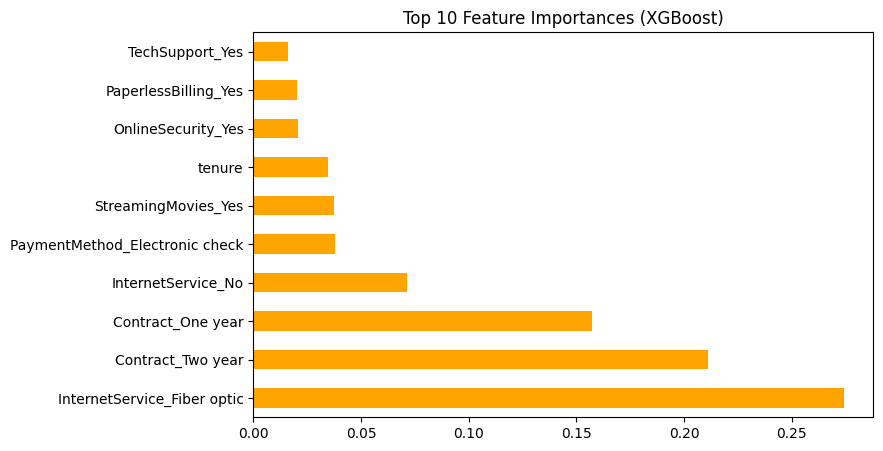

In [18]:
xgb_importances = pd.Series(xgb.feature_importances_, index=X_train.columns)
xgb_importances.nlargest(10).plot(kind='barh', figsize=(8, 5), color='orange')
plt.title('Top 10 Feature Importances (XGBoost)')
plt.show()


### ✅ Compare All Models

In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Helper function
def evaluate_model(name, y_test, y_pred, y_prob):
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_prob)
    }

results = []

results.append(evaluate_model("Logistic Regression", y_test, y_pred, y_prob))
results.append(evaluate_model("Random Forest", y_test, y_pred_rf, y_prob_rf))
results.append(evaluate_model("XGBoost", y_test, y_pred_xgb, y_prob_xgb))


results_df = pd.DataFrame(results)
results_df.set_index("Model", inplace=True)
results_df.round(3)


,Accuracy,Precision,Recall,F1 Score,ROC AUC
Model,,,,,
Logistic Regression,0.776,0.593,0.503,0.544,0.803
Random Forest,0.796,0.664,0.465,0.547,0.828
XGBoost,0.800,0.654,0.521,0.580,0.843


<Axes: title={'center': 'Model Performance Comparison'}, xlabel='Model'>

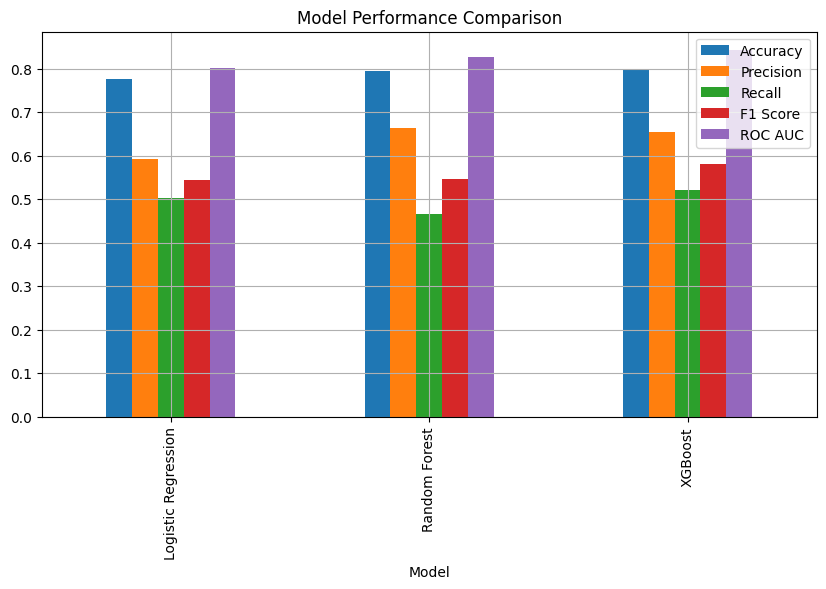

In [20]:
results_df.plot(kind='bar', figsize=(10,5), title="Model Performance Comparison", grid=True)


### ✅ Hyperparameter Tuning

##### 🔹 Use RandomizedSearchCV

In [21]:
from sklearn.model_selection import RandomizedSearchCV

##### 🔹 Run the Tuner


In [22]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5]
}



xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=25,
    scoring='roc_auc',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)


Fitting 3 folds for each of 25 candidates, totalling 75 fits


d:\Morteza\Projects\projects\Customer-Churn-Analysis\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:51:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,estimator,"XGBClassifier...ree=None, ...)"
,param_distributions,"{'colsample_bytree': [0.6, 0.8, ...], 'gamma': [0, 0.1, ...], 'learning_rate': [0.01, 0.05, ...], 'max_depth': [3, 4, ...], ...}"
,n_iter,25
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


##### 🔹 Best Model & Evaluation

In [23]:
best_xgb = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

# Predict and evaluate
y_pred_best = best_xgb.predict(X_test)
y_prob_best = best_xgb.predict_proba(X_test)[:, 1]

from sklearn.metrics import classification_report, roc_auc_score

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))
print("ROC AUC:", roc_auc_score(y_test, y_prob_best))


Best Parameters: {'subsample': 0.6, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0.3, 'colsample_bytree': 1.0}
XGBoost Accuracy: 0.801277501774308
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.66      0.51      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409

ROC AUC: 0.8461765997571625


#####  Save the Best Model

In [29]:
import joblib
joblib.dump(best_xgb, '../models/best_xgb_model.pkl')
X_test.to_csv('../data/X_test.csv', index=False)

### ✅ SHAP for XGBoost

##### 🔹 Import SHAP and Create Explainer

In [25]:
import shap

# Create explainer using the best model
explainer = shap.TreeExplainer(best_xgb)  # 'best_xgb' is your tuned XGBoost model


##### 🔹 Calculate SHAP Values

In [26]:
shap_values = explainer.shap_values(X_test)


##### 🔹 Plot Global Feature Importance

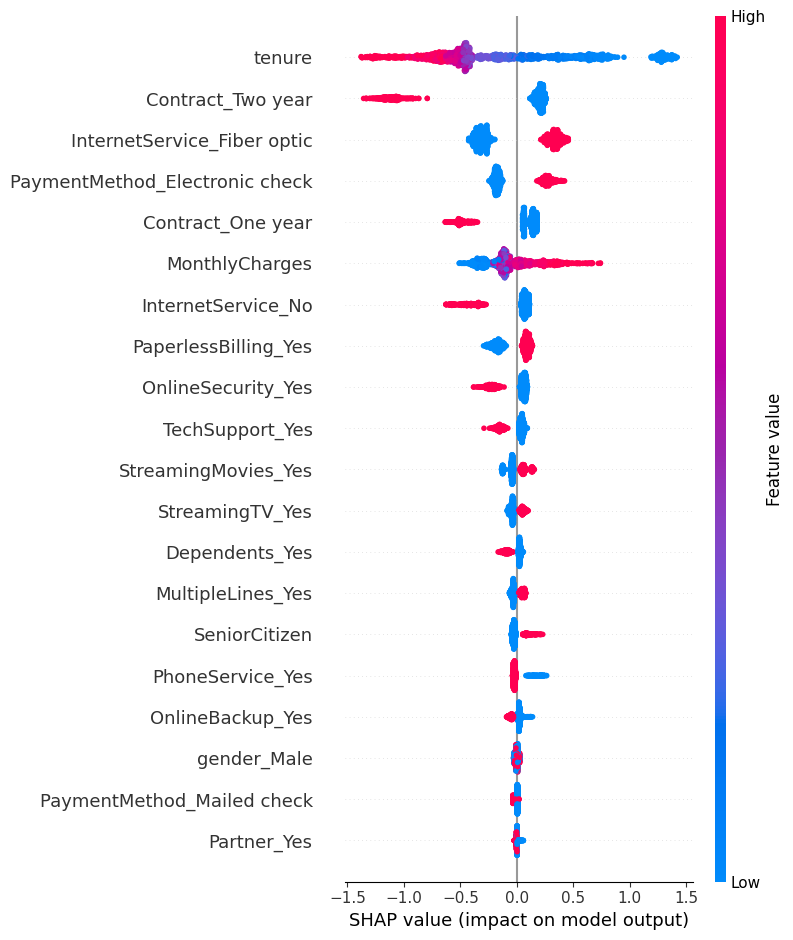

In [27]:
shap.summary_plot(shap_values, X_test)


##### 🔹 Plot Individual Prediction Explanation

In [28]:
# Plot explanation for the first test sample
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0])
